<a href="https://colab.research.google.com/github/Rajesh231/Ml/blob/master/BotnetDetection_CNN_HighestAccNdLowestLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Botnet Detection using CTU-13 dataset


In [1]:
!pip install pyyaml h5py

In [0]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization 
print(tf.__version__) 

2.2.0-rc4


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import variance_threshold 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.variance_threshold module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


**Reading the CSV file from Mounted Google Drive**

In [6]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/finalpreprocessed2.csv") 
df.head() 

,Dur,Proto,Sport,Dport,State,TotPkts,TotBytes,SrcBytes,Label
0,0.055572,1,13485,1,CON,2,128,60,0
1,0.097566,1,35155,10,CON,2,474,145,0
2,0.000000,1,35155,21,INT,1,145,145,0
3,3598.238525,1,43565,23,CON,876,96819,47731,0
4,3591.619629,1,43565,23,CON,867,95866,47068,0


In [7]:
df.shape

(1038261, 9)

**Preprocessing of the data which left after preprocessing in MS Excel**

In [8]:
X = df.drop(labels =['Label','State'],axis =1) 
X.shape

(1038261, 7)

In [0]:
y = df['Label'] 

In [0]:
#stratified shuffling is done to divide the data in equal ration on the basis of parameter label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0, stratify =y) 

In [11]:
X_train.shape

(830608, 7)

In [12]:
X_test.shape 

(207653, 7)

In [13]:
from sklearn.feature_selection import VarianceThreshold 
filter = VarianceThreshold(0.01) 
X_train = filter.fit_transform(X_train) 
X_test = filter.transform(X_test) 
X_train.shape, X_test.shape 

((830608, 7), (207653, 7))

In [0]:
#X_train_T = X_train.T
#X_test_T = X_test.T

In [0]:
#X_train_T = pd.DataFrame(X_train_T)
#X_test_T = pd.DataFrame(X_test_T)
#X_test_T.shape

In [0]:
#X_train_T.duplicated().sum()

In [0]:
#duplicated_features = X_train_T.duplicated()
#duplicated_features

In [0]:
#features_to_keep = [not index for index in duplicated_features]
#features_to_keep

In [0]:
#X_train = X_train_T[features_to_keep].T
#X_train.shape

In [0]:
#X_test = X_test_T[features_to_keep].T
#X_test.shape

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train 

array([[ 1.32183022e+00, -4.10682002e-01,  1.21757026e-01, ...,
        -5.94007613e-03, -5.25711261e-03, -2.22797778e-03],
       [-4.36049922e-01,  1.76424631e+00,  1.05061137e+00, ...,
        -4.67969135e-03, -5.04774498e-03, -2.01168354e-03],
       [ 1.36370248e+00, -4.10682002e-01, -6.23215051e-01, ...,
        -5.51994787e-03, -5.25931648e-03, -2.20572529e-03],
       ...,
       [-4.50335745e-01,  1.76424631e+00, -1.70264449e+00, ...,
         5.82351518e-03,  5.68490042e-03, -1.88113557e-03],
       [-4.50444677e-01, -4.10682002e-01, -1.78609203e+00, ...,
        -6.36020439e-03, -5.30479633e-03, -2.25260388e-03],
       [ 1.90868320e+00, -4.10682002e-01,  1.27503703e+00, ...,
        -5.09981961e-03, -5.14892264e-03, -2.06241923e-03]])

In [22]:
X_test 

array([[-0.45049884, -0.410682  ,  0.77599401, ..., -0.0063602 ,
        -0.00524549, -0.00225409],
       [-0.45049905, -0.410682  ,  1.01827929, ..., -0.0063602 ,
        -0.00530119, -0.0022526 ],
       [-0.45049862, -0.410682  ,  1.3358008 , ..., -0.0063602 ,
        -0.00526272, -0.0022526 ],
       ...,
       [ 0.89467327, -0.410682  , -0.57774486, ..., -0.00594008,
        -0.00528817, -0.00223065],
       [-0.45049838, -0.410682  ,  1.1983125 , ..., -0.0063602 ,
        -0.00531501, -0.0022526 ],
       [ 0.35424977, -0.410682  , -0.08850411, ..., -0.0063602 ,
        -0.00528476, -0.00219   ]])

In [23]:
X_train.shape,X_test.shape 

((830608, 7), (207653, 7))

In [0]:
X_train = X_train.reshape(830608,7,1) 
X_test = X_test.reshape(207653,7,1) 

In [25]:
X_test.shape,X_train.shape 

((207653, 7, 1), (830608, 7, 1))

In [0]:
ytest = y_test

In [0]:
#as y is a series so y_train and y_test are also series therefore we need to convert them to a numpy array.
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

**Model buildin process starts from here. I will build this model using Convolutional Neural Networks**

In [27]:
from tensorflow.keras.layers import MaxPool1D
from keras.models import load_model
model = Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size =2))
model.add(Dropout(0.1))

model = Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model = Sequential()
model.add(Conv1D(128,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv1D(256,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))
#model.add(EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min', baseline=None, restore_best_weights=True))


Using TensorFlow backend.


In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 256)            1024      
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 256)            1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [0]:
# compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
#model.compile(optimizer=SGD(lr=0.000005),loss ="binary_crossentropy",metrics = ['f1_score'])
model.compile(optimizer=Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy']) 

#simple early stopping and model chekcpoint functions
es = EarlyStopping(monitor='val_loss',mode = 'min',verbose =1,patience = 15)
mc = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/best_model111.h5",monitor = 'val_loss', mode = 'min', verbose =1, save_best_only = True)
lr = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 8, verbose = 0, mode = "min", min_delta= 1e-03, cooldown = 0,min_lr = 0)
# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

In [30]:
history = model.fit(X_train,y_train,epochs = 225,validation_split=0.25 ,verbose =1,callbacks=[es,mc,lr])

Epoch 1/225
19468/19468 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9914
Epoch 00001: val_loss improved from inf to 0.02601, saving model to /content/drive/My Drive/Colab Notebooks/best_model111.h5
19468/19468 [==============================] - 105s 5ms/step - loss: 0.0299 - accuracy: 0.9914 - val_loss: 0.0260 - val_accuracy: 0.9919 - lr: 5.0000e-04
Epoch 2/225
19459/19468 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9921
Epoch 00002: val_loss improved from 0.02601 to 0.02442, saving model to /content/drive/My Drive/Colab Notebooks/best_model111.h5
19468/19468 [==============================] - 106s 5ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0244 - val_accuracy: 0.9921 - lr: 5.0000e-04
Epoch 3/225
19460/19468 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9922
Epoch 00003: val_loss did not improve from 0.02442
19468/19468 [==============================] - 106s 5ms/step - loss: 0.0257 - accura

In [31]:
# Recreate the exact same model, including its weights and the optimizer by loading our saved model.
model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/best_model111.h5")

# Show the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 256)            1024      
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 256)            1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

**Evaluating the loaded or saved model to have a glance over training accuracy, training loss and testing accuracy, testing loss**

In [32]:
#evaluating the model 
trainloss,trainacc = model.evaluate(X_train,y_train,verbose=0)
testloss,testacc = model.evaluate(X_test,y_test,verbose=0)
print('train: trainacc= %.3f,trainloss= %.3f, Test: testacc= % .3f, testloss= %.3f'%(trainacc,trainloss,testacc,testloss))

train: trainacc= 0.997,trainloss= 0.009, Test: testacc=  0.997, testloss= 0.009


In [0]:
 y_predict = model.predict(X_test)

In [34]:
y_predict

array([[4.4570192e-15],
       [4.4478616e-16],
       [1.2327395e-17],
       ...,
       [3.6831502e-22],
       [1.0649550e-27],
       [1.3781717e-17]], dtype=float32)

In [35]:
history.history

{'accuracy': [0.9913749694824219,
  0.9920732975006104,
  0.9922000765800476,
  0.9923317432403564,
  0.9923397302627563,
  0.9924489259719849,
  0.9926190376281738,
  0.9927586913108826,
  0.9930300116539001,
  0.9932771921157837,
  0.9933109283447266,
  0.9933109283447266,
  0.9932258725166321,
  0.9929625988006592,
  0.9934232831001282,
  0.9934393167495728,
  0.9934200644493103,
  0.9933173656463623,
  0.9935292601585388,
  0.9936335682868958,
  0.9934987425804138,
  0.9937427639961243,
  0.9935934543609619,
  0.9937379360198975,
  0.9938326478004456,
  0.993851900100708,
  0.9936480522155762,
  0.9937395453453064,
  0.9939128756523132,
  0.9940220713615417,
  0.9945389628410339,
  0.9946224093437195,
  0.9946946501731873,
  0.994633674621582,
  0.9947508573532104,
  0.9948021769523621,
  0.994834303855896,
  0.994864821434021,
  0.9948583841323853,
  0.9947813153266907,
  0.9949081540107727,
  0.9948792457580566,
  0.9949595332145691,
  0.994961142539978,
  0.9950269460678101,
  0

In [36]:
print(history.history['accuracy'])

[0.9913749694824219, 0.9920732975006104, 0.9922000765800476, 0.9923317432403564, 0.9923397302627563, 0.9924489259719849, 0.9926190376281738, 0.9927586913108826, 0.9930300116539001, 0.9932771921157837, 0.9933109283447266, 0.9933109283447266, 0.9932258725166321, 0.9929625988006592, 0.9934232831001282, 0.9934393167495728, 0.9934200644493103, 0.9933173656463623, 0.9935292601585388, 0.9936335682868958, 0.9934987425804138, 0.9937427639961243, 0.9935934543609619, 0.9937379360198975, 0.9938326478004456, 0.993851900100708, 0.9936480522155762, 0.9937395453453064, 0.9939128756523132, 0.9940220713615417, 0.9945389628410339, 0.9946224093437195, 0.9946946501731873, 0.994633674621582, 0.9947508573532104, 0.9948021769523621, 0.994834303855896, 0.994864821434021, 0.9948583841323853, 0.9947813153266907, 0.9949081540107727, 0.9948792457580566, 0.9949595332145691, 0.994961142539978, 0.9950269460678101, 0.9950526356697083, 0.9950799345970154, 0.9950718879699707, 0.9951585531234741, 0.9951906800270081, 0.99

In [85]:
y_proba = model.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [0]:
def plot_learningCurve(history,epoch):
  #ploting training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

#plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

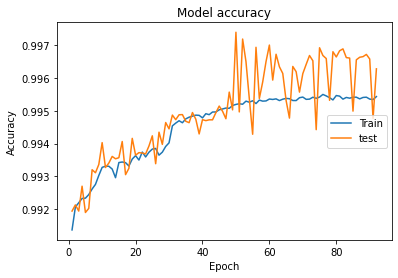

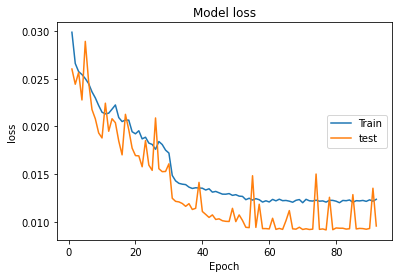

In [39]:
plot_learningCurve(history,92)

**By looking at the above learning curves we can say that our model is neither underfitting nor overfitting as the curves for both training and testing data are nearly same. If model was underfitting then these two curves would have huge variation and if model was overfitting then these two curves may be moving in opposite direction**

In [0]:
y_predict = np.asarray(y_predict)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict.round()))
print(classification_report(y_test.round(),y_predict.round()))

[[202156    105]
 [   613   4779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202261
           1       0.98      0.89      0.93      5392

    accuracy                           1.00    207653
   macro avg       0.99      0.94      0.96    207653
weighted avg       1.00      1.00      1.00    207653



In [42]:
from sklearn.metrics import confusion_matrix
conff = confusion_matrix(y_test,y_predict.round())
conff

array([[202156,    105],
       [   613,   4779]])

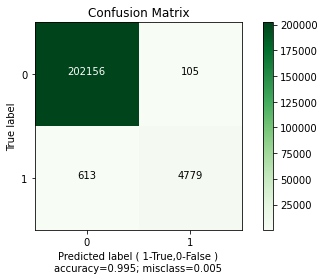

In [43]:
#Plotting Confusion matrix
import itertools
import matplotlib.pyplot as plt
classes = [0,1]
plt.imshow(conff,interpolation='nearest',cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
accuracy = max(history.history['accuracy'])
misclass =1-max(history.history['accuracy'])
fmt ='d'
thresh = conff.max()/2
for i, j in itertools.product(range(conff.shape[0]),range(conff.shape[1])):
  plt.text(j,i,format(conff[i,j],fmt),horizontalalignment='center', color="white" if conff[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  #plt.xlabel('Predicted label')
  plt.xlabel('Predicted label ( 1-True,0-False )\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))

In [0]:
TP = true_positives = 4779
TN = true_negatives = 202156
FP = false_positives = 613
FN = false_negatives = 105

In [45]:
results={}
metric = "Accuracy"
results[metric]=(TP+TN)/(TP+TN+FP+FN)
print(f"{metric} is {results[metric]: .4f}")

Accuracy is  0.9965


In [46]:
metric = "Precision"
results[metric]=TP/(TP+FN)
print(f"{metric} is {results[metric]: .4f}")

Precision is  0.9785


In [47]:
metric = "Recall"
results[metric]=TP/(TP+FP)
print(f"{metric} is {results[metric]: .4f}")

Recall is  0.8863


In [48]:
metric = "F1-Score"
results[metric]= 2/(1/results["Precision"]+1/results["Recall"])
print(f"{metric} is {results[metric]: .4f}")

F1-Score is  0.9301


In [56]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_predict.round()): .3f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_predict.round()): .2f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_predict.round()): .2f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_predict.round()): .2f}")

Actual accuracy_score :  0.997
Actual recall_score :  0.89
Actual precision_score :  0.98
Actual f1_score :  0.93


In [86]:
y_predict

array([[4.4570192e-15],
       [4.4478616e-16],
       [1.2327395e-17],
       ...,
       [3.6831502e-22],
       [1.0649550e-27],
       [1.3781717e-17]], dtype=float32)

In [87]:
y_proba

array([[4.4570192e-15],
       [4.4478616e-16],
       [1.2327395e-17],
       ...,
       [3.6831502e-22],
       [1.0649550e-27],
       [1.3781717e-17]], dtype=float32)

**Now, let's see the ROC curve with scikit's implementation**

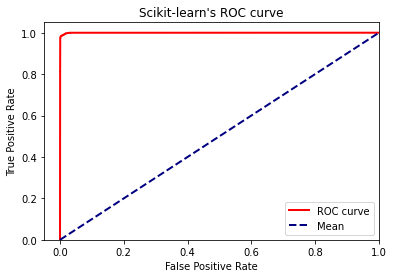

In [89]:
from sklearn import metrics
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

**The peak towards left-most corner means near perfect classifier, while random prediction will have the curve as the blue dotted straight line.
This ROC curve tells us that our model is nearly perfect classifier, with high accuracy :)**

**Let's calculate an ROC curve with random predictions, and plot it to see the difference.**

In [97]:
# create random predictions
rand_proba = np.random.random(size=(y_proba.shape))
rand_proba[:5]  # 0.5 probability of being 0 or 1

array([[0.77023557],
       [0.71823286],
       [0.98953128],
       [0.62918659],
       [0.55073994]])

In [0]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [0]:
delta=0.1
def get_roc_curve(y_test, y_proba, delta=0.1):
    """
    Return the True Positive Rates (TPRs), False Positive Rates (FPRs), 
    and the threshold values, seperated by delta.
    """
    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        # confusion matrix from the function we defined
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [0]:
FPRs, TPRs, _ = get_roc_curve(y_test, rand_proba, delta)  # passing random preds

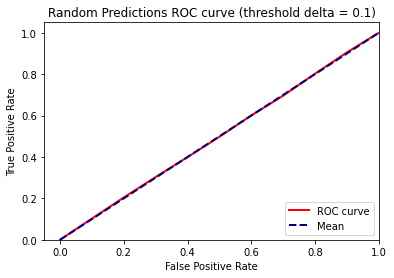

In [101]:
# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Predictions ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

**Now, that we know about ROC curve, what it represents, AUC score is very easy to understand.
AUC stands for Area under the Curve, which is nothing but the area under the ROC curve formed by the predictions.
As we saw, a totally random prediction will have AUC score 0.5, while a perfect classifier will have AUC score of 1.**

In [107]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9997


**This score suggests that our model is very Good classifier, If we round of this score to 2-3 decimal places then we will get a score of 1 :)**.

**End of Model Evaluation Process**

                                                        END of Model Evaluation